# Mental Health Analysis

## Loading the dataset and Initial Exploration

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Mental Health Dataset.csv')

df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
# checking for null values
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [4]:
# filling missing values

df['self_employed'].fillna('Unknown', inplace=True)

missing_values = df['self_employed'].isnull().sum()
print(missing_values)

0


/var/folders/y3/8625qwkj709c_tjz60jsywfc0000gn/T/ipykernel_32737/3469025430.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('Unknown', inplace=True)


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

dtypes_info = df.dtypes

dtypes_info

Timestamp                  datetime64[ns]
Gender                             object
Country                            object
Occupation                         object
self_employed                      object
family_history                     object
treatment                          object
Days_Indoors                       object
Growing_Stress                     object
Changes_Habits                     object
Mental_Health_History              object
Mood_Swings                        object
Coping_Struggles                   object
Work_Interest                      object
Social_Weakness                    object
mental_health_interview            object
care_options                       object
dtype: object

## Exploratory Analysis

### Demographic Overview

#### Number of Responses per Country

/var/folders/y3/8625qwkj709c_tjz60jsywfc0000gn/T/ipykernel_32737/360157635.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=country_counts.index, y=country_counts.values, palette=color_palette)


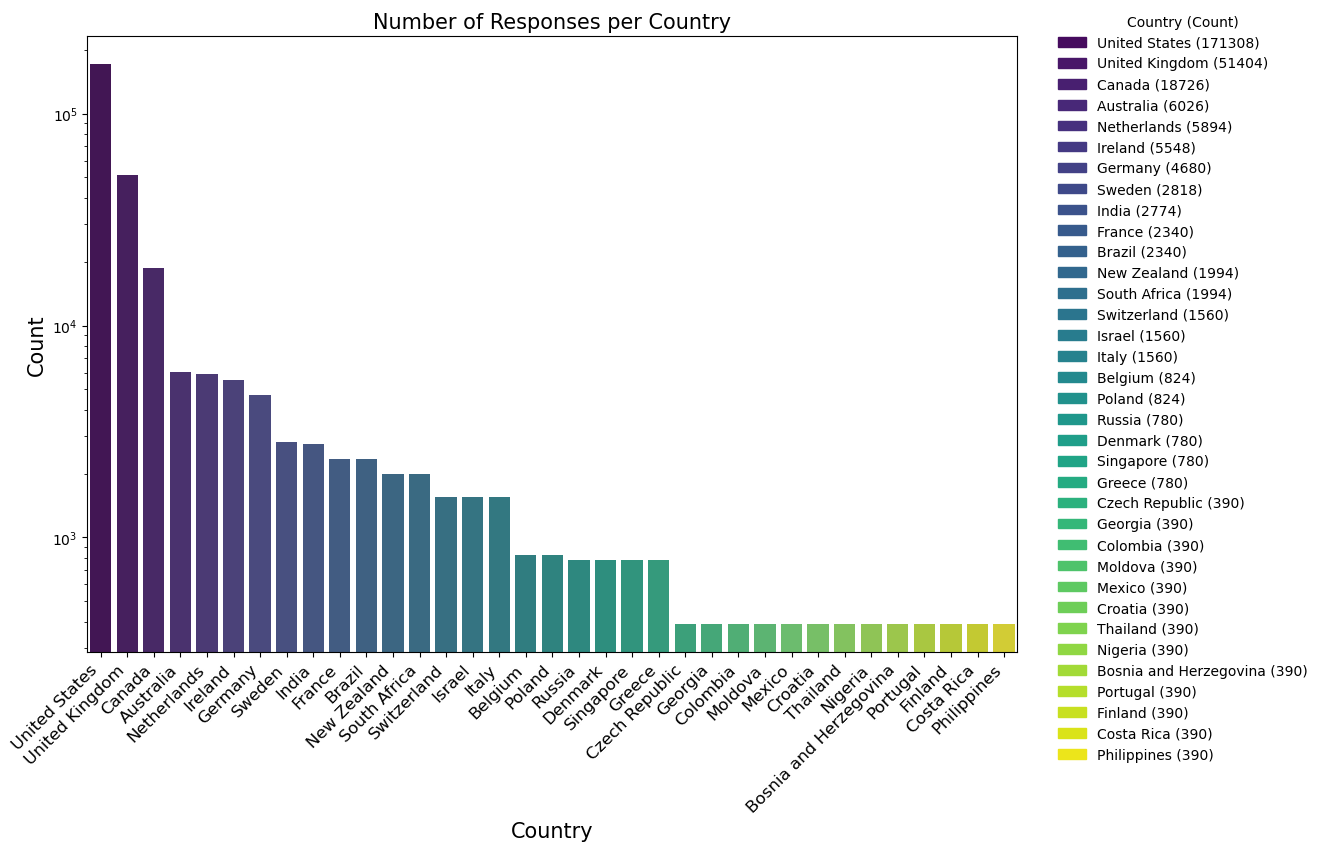

In [6]:
country_counts = df['Country'].value_counts()

plt.figure(figsize=(12, 8))

color_palette = sns.color_palette("viridis", len(country_counts))

bars = sns.barplot(x=country_counts.index, y=country_counts.values, palette=color_palette)

plt.title('Number of Responses per Country', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.yscale('log')

handles = [plt.Rectangle((0, 0), 1, 1, color=color_palette[i]) for i in range(len(color_palette))]
labels = [f"{country} ({count})" for country, count in country_counts.items()]
legend = plt.legend(handles, labels, title='Country (Count)', bbox_to_anchor=(1.03, 1.055), loc='upper left', fontsize=10)
legend.get_frame().set_visible(False)

plt.show()


#### Gender Distribution

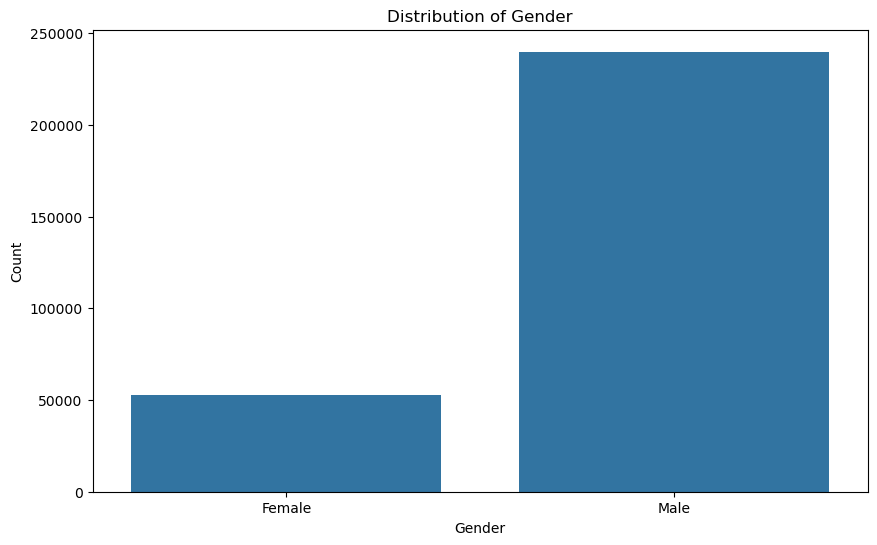

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Self-Employment Distribution

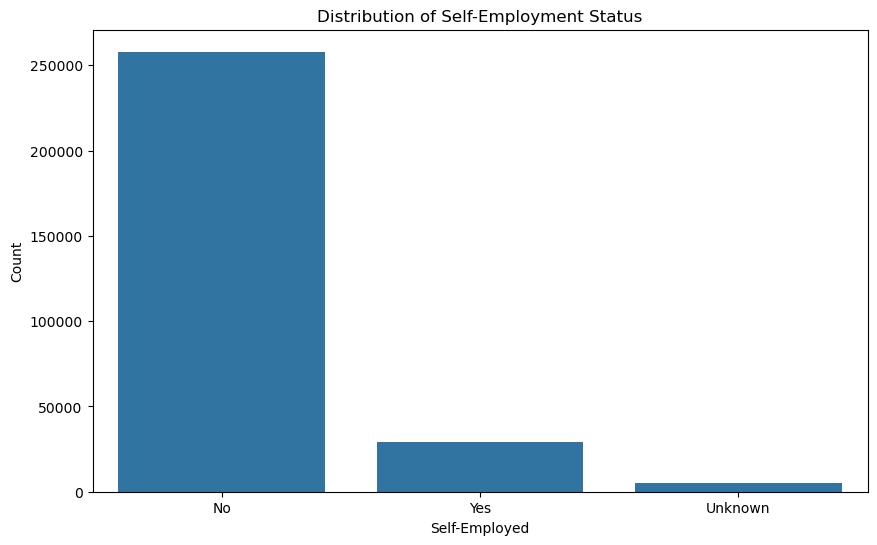

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='self_employed', order=['No', 'Yes', 'Unknown'])
plt.title('Distribution of Self-Employment Status')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()

#### Days Indoors Distribution

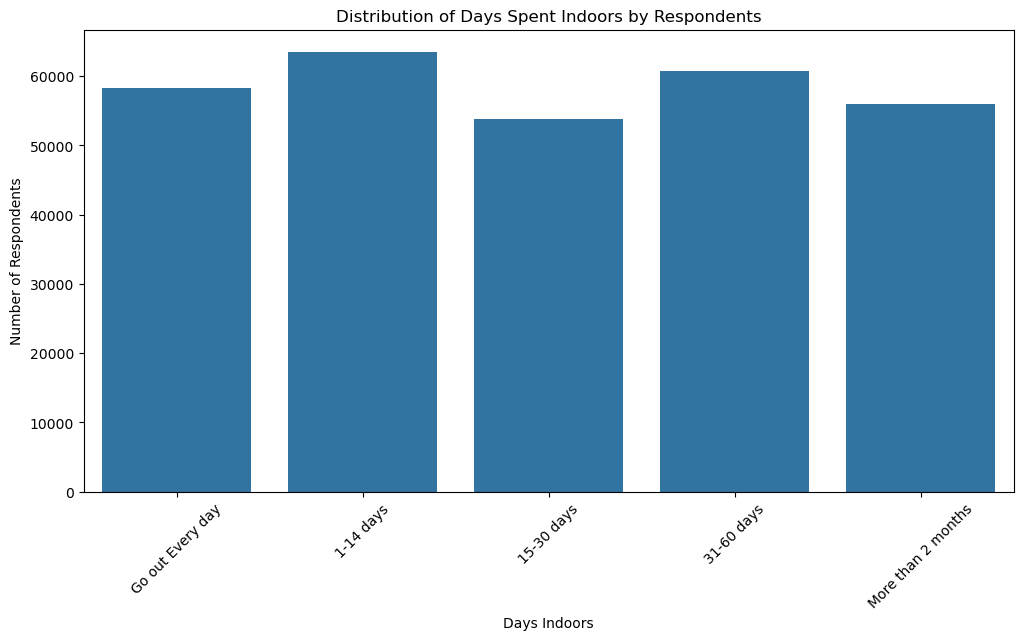

In [9]:
custom_order = ['Go out Every day', '1-14 days', '15-30 days', '31-60 days', 'More than 2 months']

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Days_Indoors', order=custom_order)
plt.title('Distribution of Days Spent Indoors by Respondents')
plt.xlabel('Days Indoors')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

### Mental Health Treatment Insights

#### Mental Health Treatment Distribution

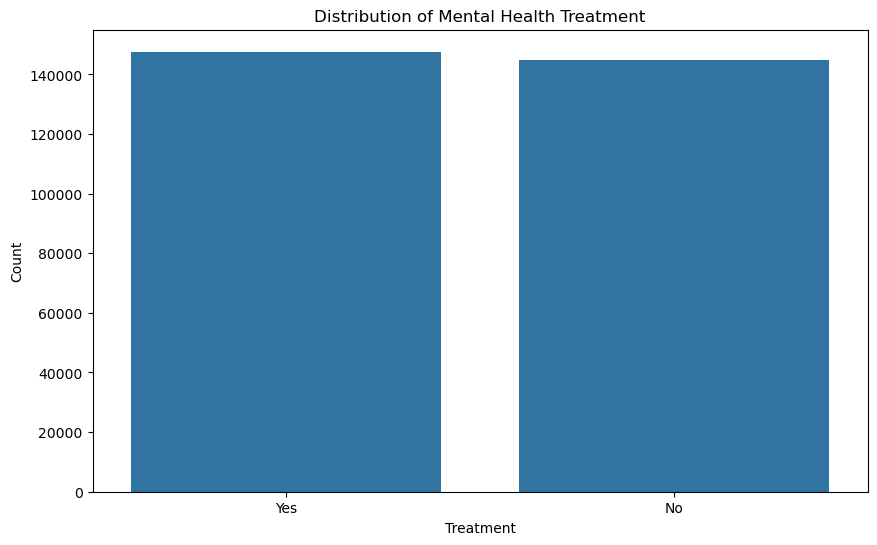

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='treatment')
plt.title('Distribution of Mental Health Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

#### Mental Health Treatment - Gender Distribution

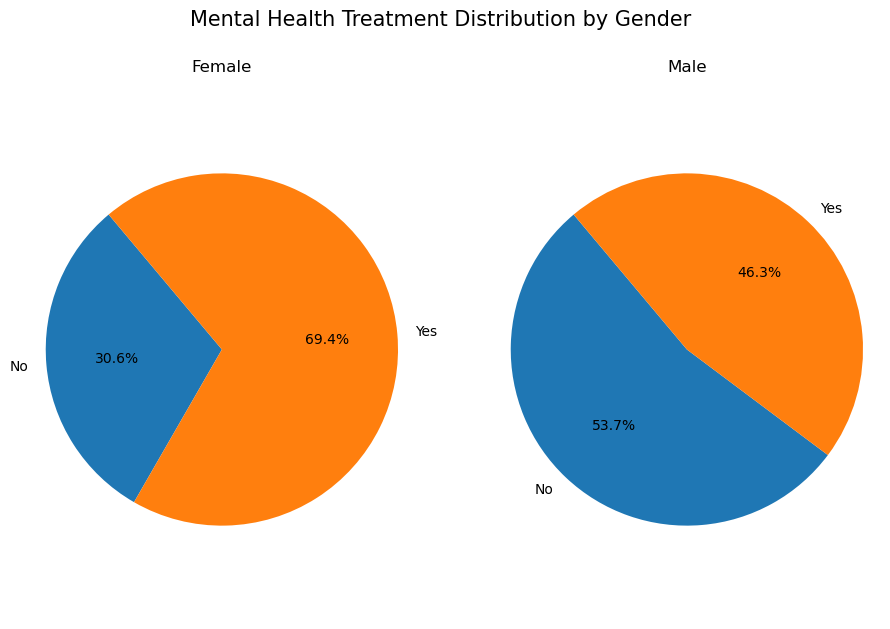

In [11]:
treatment_by_gender = df.groupby('Gender')['treatment'].value_counts(normalize=True).unstack()


fig, axes = plt.subplots(1, 2, figsize=(11, 7))


for i, gender in enumerate(treatment_by_gender.index):
    axes[i].pie(treatment_by_gender.loc[gender], labels=treatment_by_gender.columns, autopct='%1.1f%%', startangle=130)
    axes[i].set_title(f'{gender}')
    axes[i].axis('equal')

plt.suptitle('Mental Health Treatment Distribution by Gender', fontsize=15)
plt.show()

### Employment and Occupation Factors

#### Relationship between Self-employment and Treatment

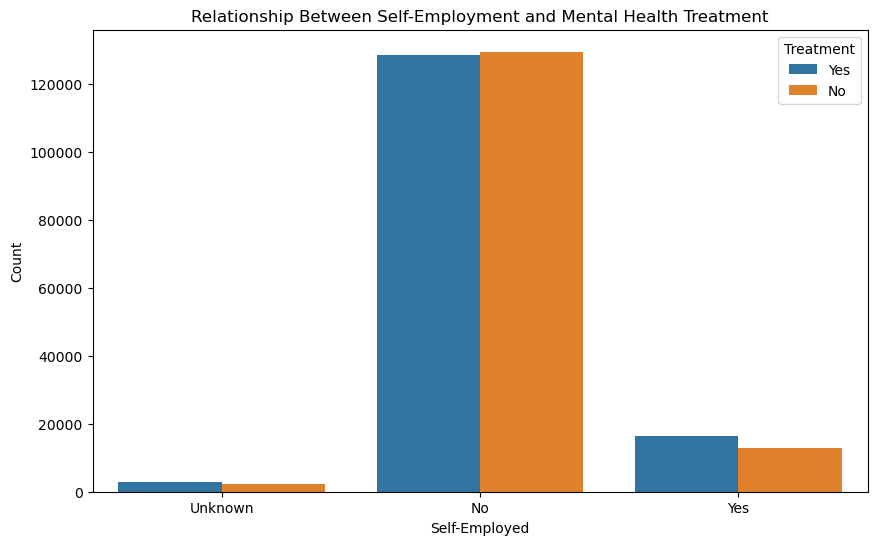

In [12]:
# relationship between Self-Employment and Treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='self_employed', hue='treatment')
plt.title('Relationship Between Self-Employment and Mental Health Treatment')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()

#### Distribution of Mental Health History by Occupation


In [13]:
summary_table = df.groupby(['Occupation', 'Mental_Health_History']).size().reset_index(name='Count')

pivot_table = summary_table.pivot(index='Occupation', columns='Mental_Health_History', values='Count')

print(pivot_table)

Mental_Health_History  Maybe     No    Yes
Occupation                                
Business               13228  20729  16192
Corporate              23310  19267  18652
Housewife              23552  22322  20477
Others                 14579  18642  19620
Student                20709  23058  18027


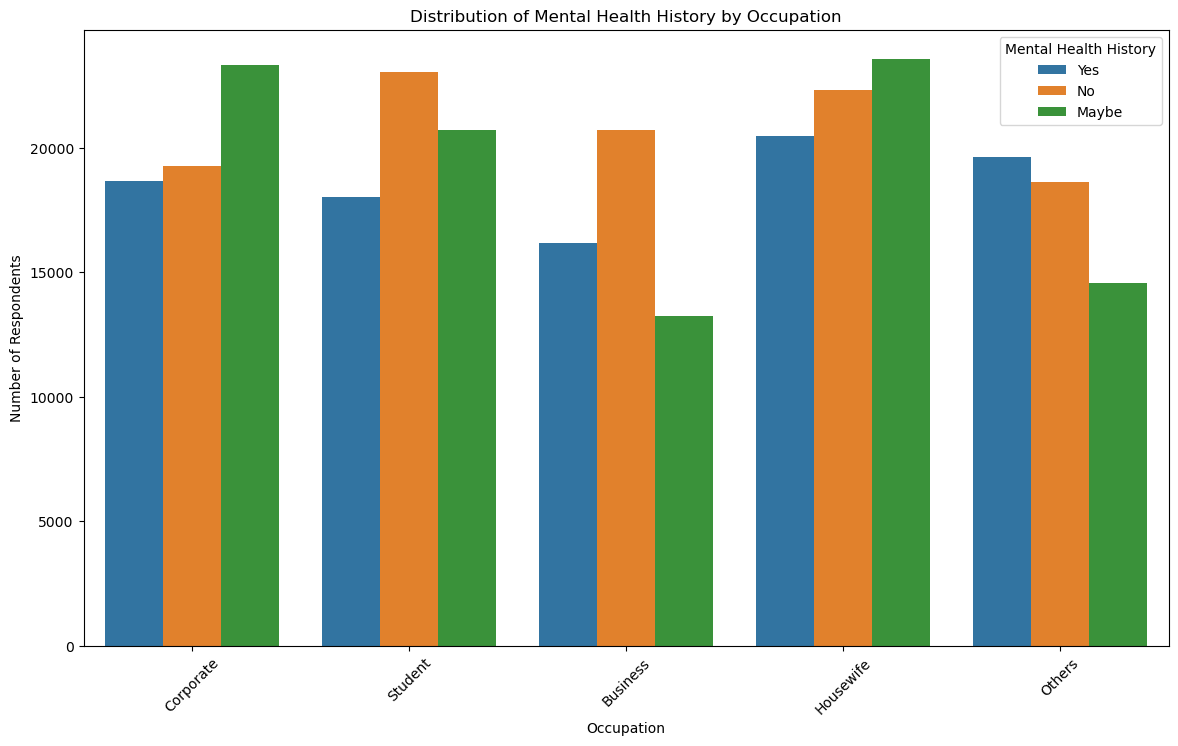

In [14]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Occupation', hue='Mental_Health_History')
plt.title('Distribution of Mental Health History by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Mental Health History')
plt.show()

### Environmental and Lifestyle Impacts on Mental Health


#### Relationship between Days Indoors and Mental Health History


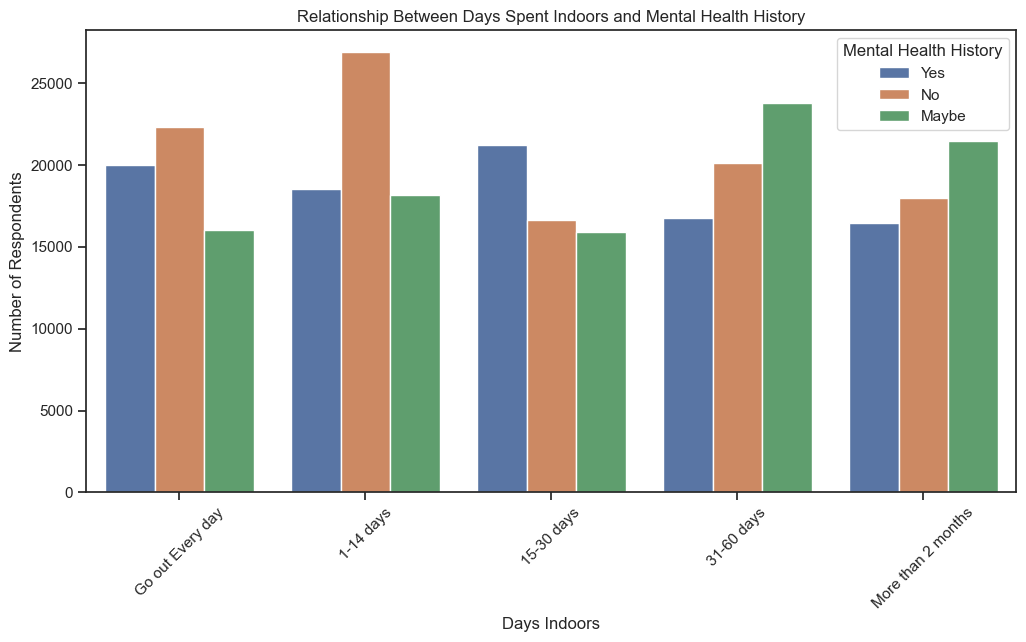

In [23]:
days_order = ['Go out Every day', '1-14 days', '15-30 days', '31-60 days', 'More than 2 months']

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Days_Indoors', hue='Mental_Health_History', order=days_order)
plt.title('Relationship Between Days Spent Indoors and Mental Health History')
plt.xlabel('Days Indoors')
plt.ylabel('Number of Respondents')
plt.legend(title='Mental Health History')
plt.xticks(rotation=45)
plt.show()

#### Relationship between Days Indoors and Coping Struggles

#### Relationship between Growing Stress and Coping Struggle


#### Relationship between Growing Stress and Mental Health Treatment


#### Relationship between Changes in Habits and Mental Health Treatment


### Coping, Social Dynamics, and Treatment

#### Relationship between Coping Struggles and Mental Health Treatment


#### Relationship between Work Interest and Social Weakness


#### Relationship between Work Interest and Mental Health Treatment


#### Relationship between Social Weakness and Mental Health Treatment


#### Relationship between Family History and Mental Health Interview Willingness


### Comprehensive Analysis and Correlations


#### Correlation Matrix
